In [133]:
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, LSTM, GRU
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
tf.__version__


#import seaborn as sns
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix, precision_recall_curve
#from sklearn.metrics import recall_score, classification_report, auc, roc_curve
#from sklearn.metrics import precision_recall_fscore_support, f1_score
#from sklearn.preprocessing import StandardScaler
from pylab import rcParams
tf.__version__

'1.8.0'

# Model Name

In [134]:
name = "ABS_Keras-GRU254GRU128D32D2-adam{}".format(int(time.time()))
#name_noTime = "ABS_Keras-LSTM128LSTM128D32D2-adam"

# Choose default months & paths, columns(features) and number of loans to load, train/test split

In [135]:
#parameters to choose

default_months = 6
nrows = 1000000
train_split = 0.80
model = keras
path = 'c:/users/ugy1/abs/'
rows_for_prediction = 1000
cutOfffForOriginationDate='2012-01-01'

all_columns = [
    'abs_loan.cik',
 'abs_loan.accessionnumber',
 'abs_loan.assettypenumber',
 'abs_loan.assetnumber',
 'abs_loan.reportingperiodbeginningdate',
 'abs_loan.reportingperiodendingdate',
 'abs_loan.originatorname',
 'abs_loan.originationdate',
 'abs_loan.originalloanamount',
 'abs_loan.originalloanterm',
 'abs_loan.loanmaturitydate',
 'abs_loan.originalinterestratepercentage',
 'abs_loan.interestcalculationtypecode',
 'abs_loan.originalinterestratetypecode',
 'abs_loan.originalinterestonlytermnumber',
 'abs_loan.originalfirstpaymentdate',
 'abs_loan.underwritingindicator',
 'abs_loan.graceperiodnumber',
 'abs_loan.paymenttypecode',
 'abs_loan.subvented',
 'abs_loan.vehiclemanufacturername',
 'abs_loan.vehiclemodelname',
 'abs_loan.vehiclenewusedcode',
 'abs_loan.vehiclemodelyear',
 'abs_loan.vehicletypecode',
 'abs_loan.vehiclevalueamount',
 'abs_loan.vehiclevaluesourcecode',
 'abs_loan.obligorcreditscoretype',
 'abs_loan.obligorcreditscore',
 'abs_loan.obligorincomeverificationlevelcode',
 'abs_loan.obligoremploymentverificationcode',
 'abs_loan.coobligorindicator',
 'abs_loan.paymenttoincomepercentage',
 'abs_loan.obligorgeographiclocation',
 'abs_loan.assetaddedindicator',
 'abs_loan.remainingtermtomaturitynumber',
 'abs_loan.reportingperiodmodificationindicator',
 'abs_loan.servicingadvancemethodcode',
 'abs_loan.reportingperiodbeginningloanbalanceamount',
 'abs_loan.nextreportingperiodpaymentamountdue',
 'abs_loan.reportingperiodinterestratepercentage',
 'abs_loan.nextinterestratepercentage',
 'abs_loan.servicingfeepercentage',
 'abs_loan.servicingflatfeeamount',
 'abs_loan.otherservicerfeeretainedbyservicer',
 'abs_loan.otherassesseduncollectedservicerfeeamount',
 'abs_loan.scheduledinterestamount',
 'abs_loan.scheduledprincipalamount',
 'abs_loan.otherprincipaladjustmentamount',
 'abs_loan.reportingperiodactualendbalanceamount',
 'abs_loan.reportingperiodscheduledpaymentamount',
 'abs_loan.totalactualamountpaid',
 'abs_loan.actualinterestcollectedamount',
 'abs_loan.actualprincipalcollectedamount',
 'abs_loan.actualothercollectedamount',
 'abs_loan.serviceradvancedamount',
 'abs_loan.interestpaidthroughdate',
 'abs_loan.zerobalanceeffectivedate',
 'abs_loan.zerobalancecode',
 'abs_loan.currentdelinquencystatus',
 'abs_loan.primaryloanservicername',
 'abs_loan.mostrecentservicingtransferreceiveddate',
 'abs_loan.assetsubjectdemandindicator',
 'abs_loan.assetsubjectdemandstatuscode',
 'abs_loan.repurchaseamount',
 'abs_loan.demandresolutiondate',
 'abs_loan.repurchasername',
 'abs_loan.repurchasereplacementreasoncode',
 'abs_loan.chargedoffprincipalamount',
 'abs_loan.recoveredamount',
 'abs_loan.modificationtypecode',
 'abs_loan.paymentextendednumber',
 'abs_loan.repossessedindicator',
 'abs_loan.repossessedproceedsamount']

use_columns = ['abs_loan.originationdate', 'abs_loan.originalloanamount','abs_loan.originalloanterm',
'abs_loan.originalinterestratepercentage','abs_loan.subvented','abs_loan.vehiclenewusedcode','abs_loan.vehiclevalueamount',
'abs_loan.obligorcreditscore','abs_loan.obligorincomeverificationlevelcode','abs_loan.obligoremploymentverificationcode',
'abs_loan.paymenttoincomepercentage','abs_loan.remainingtermtomaturitynumber',
'abs_loan.reportingperiodbeginningloanbalanceamount','abs_loan.nextreportingperiodpaymentamountdue',
'abs_loan.reportingperiodinterestratepercentage','abs_loan.nextinterestratepercentage',
'abs_loan.servicingfeepercentage','abs_loan.otherservicerfeeretainedbyservicer',
'abs_loan.otherassesseduncollectedservicerfeeamount','abs_loan.scheduledinterestamount', 
'abs_loan.scheduledprincipalamount','abs_loan.otherprincipaladjustmentamount',
'abs_loan.reportingperiodactualendbalanceamount','abs_loan.reportingperiodscheduledpaymentamount',
'abs_loan.totalactualamountpaid','abs_loan.actualinterestcollectedamount','abs_loan.actualprincipalcollectedamount',
'abs_loan.actualothercollectedamount','abs_loan.serviceradvancedamount', 'abs_loan.currentdelinquencystatus']

# GPU Options

In [136]:
#set gpu options to adjust gpu usage
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
# sess=tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

# Load data

In [137]:
df=pd.read_csv(path+'datasets/s3tab/abs_loan.csv', 
               #usecols=column_list, 
               sep='\t',
               nrows=nrows,
               low_memory=False, 
              #index_col='abs_loan.originationdate', 
               parse_dates=True
              )
#display data shape
print(df.shape)

(1000000, 74)


In [138]:
#view first five rows of all columns
df.head()

,abs_loan.cik,abs_loan.accessionnumber,abs_loan.assettypenumber,abs_loan.assetnumber,abs_loan.reportingperiodbeginningdate,abs_loan.reportingperiodendingdate,abs_loan.originatorname,abs_loan.originationdate,abs_loan.originalloanamount,abs_loan.originalloanterm,...,abs_loan.repurchaseamount,abs_loan.demandresolutiondate,abs_loan.repurchasername,abs_loan.repurchasereplacementreasoncode,abs_loan.chargedoffprincipalamount,abs_loan.recoveredamount,abs_loan.modificationtypecode,abs_loan.paymentextendednumber,abs_loan.repossessedindicator,abs_loan.repossessedproceedsamount
0,1725617,0000929638-18-000030,BMW2018-A,1001536189,2017-11-01,2017-11-30,BMW Bank of North America,2012-12-31,25124.50,72,...,0.0,NaN,NaN,[],0.0,0.0,[],NaN,False,0.0
1,1725617,0000929638-18-000030,BMW2018-A,1001536759,2017-11-01,2017-11-30,BMW Bank of North America,2012-12-31,43257.34,72,...,0.0,NaN,NaN,[],0.0,0.0,[],NaN,False,0.0
2,1725617,0000929638-18-000030,BMW2018-A,1001536970,2017-11-01,2017-11-30,BMW Bank of North America,2012-12-31,56917.54,72,...,0.0,NaN,NaN,[],0.0,0.0,[],NaN,False,0.0
3,1725617,0000929638-18-000030,BMW2018-A,1001537061,2017-11-01,2017-11-30,BMW Bank of North America,2012-12-31,42003.57,72,...,0.0,NaN,NaN,[],0.0,0.0,[],NaN,False,0.0
4,1725617,0000929638-18-000030,BMW2018-A,1001537088,2017-11-01,2017-11-30,BMW Bank of North America,2012-12-31,77217.85,72,...,0.0,NaN,NaN,[],0.0,0.0,[],NaN,False,0.0


In [139]:
#remove 'abs_loan.' string from columns because dot is a command in pandas
df.columns=df.columns.str.replace('abs_loan.','')

# Function to Draw Bar chart

In [140]:
#function to draw a bar chart 
def draw(data, title, ylabel, sort = False):
    labels = pd.value_counts(data).index.tolist()
    count_classes = pd.value_counts(data, sort)
    count_classes.plot(kind = 'bar', rot=0)
    plt.xticks(range(len(labels)), labels)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()
    print(pd.value_counts(data))

# Number of Days Loans Outstanding

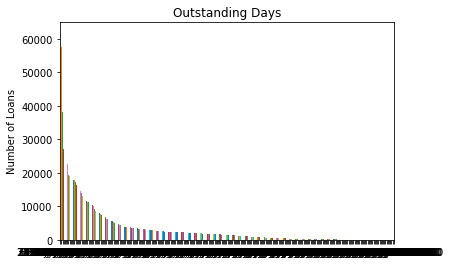

31 days      61820
0 days       57592
61 days      38272
245 days     26971
275 days     25217
365 days     24866
92 days      22566
273 days     19270
426 days     18960
577 days     18486
334 days     18322
304 days     17953
151 days     17829
212 days     17305
214 days     16357
396 days     16156
306 days     16013
243 days     14532
638 days     13890
669 days     13195
59 days      12245
120 days     12042
181 days     11727
546 days     11406
730 days     11197
608 days     10968
62 days      10622
516 days     10402
457 days     10065
90 days       9279
             ...  
2253 days       39
2222 days       39
2103 days       37
2252 days       32
2376 days       31
2283 days       29
2406 days       28
2467 days       26
2100 days       26
2437 days       25
1947 days       25
2498 days       23
2068 days       21
2133 days       19
2343 days       19
1976 days       18
1915 days       18
1854 days       18
2164 days       17
2312 days       14
2557 days       12
2526 days   

In [141]:
#calculate outstanding days
df['outstandingdays'] = pd.to_datetime(df['reportingperiodendingdate'])-pd.to_datetime(df['originationdate'])
#draw a chart for visual look and analysis
draw(df.outstandingdays, title='Outstanding Days', ylabel='Number of Loans', sort = True)

In [142]:
#remove days string for machine learning
df['outstandingdays']=df.outstandingdays.map(lambda x: np.nan if pd.isnull(x) else x.days)
#display last five rows
df.outstandingdays.tail()

999995    396
999996    365
999997    396
999998    396
999999    365
Name: outstandingdays, dtype: int64

In [143]:
#retaining only loans with non-negative outstanding days
u=pd.value_counts(df.outstandingdays<0)
if len(u)<2:
    print('No Loans Below zero outstanding days')
else: 
    print('Number of Loans with negative outstanding days :', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with only non-negative outstanding days')
    df=df[df.outstandingdays>0]   

No Loans Below zero outstanding days


In [144]:
df.outstandingdays.describe()

count    1000000.000000
mean         476.152630
std          460.655651
min            0.000000
25%          151.000000
50%          335.000000
75%          638.000000
max         2618.000000
Name: outstandingdays, dtype: float64

# Days Left until Maturity

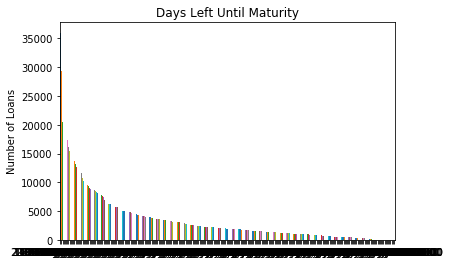

2191 days    36003
2160 days    29398
1461 days    20524
1977 days    20256
1826 days    20173
2192 days    19632
1946 days    17270
1614 days    16173
1795 days    15512
2130 days    14969
1916 days    14362
1522 days    13692
1249 days    13622
1583 days    13128
2161 days    12610
1430 days    12582
1553 days    12456
1675 days    12136
1765 days    11577
1400 days    10828
1492 days    10199
1188 days     9838
1645 days     9636
1157 days     9524
1218 days     9281
2007 days     9087
1096 days     8865
1310 days     8806
1369 days     8616
2222 days     8590
             ...  
182 days       268
-61 days       262
-92 days       251
-30 days       245
59 days        243
641 days       236
580 days       235
62 days        204
244 days       186
276 days       138
215 days       138
486 days       127
2283 days      112
2312 days       81
89 days         32
-153 days        9
881 days         6
760 days         5
2341 days        3
820 days         3
-184 days        3
-122 days   

In [145]:
df['daystomaturity'] = pd.to_datetime(df['loanmaturitydate'])-pd.to_datetime(df['reportingperiodendingdate'])
draw(df.daystomaturity, title='Days Left Until Maturity', ylabel='Number of Loans', sort=True)

In [146]:
#remove days from the data for machine learning
df['daystomaturity']=df.daystomaturity.map(lambda x: np.nan if pd.isnull(x) else x.days)
df.daystomaturity.tail()

999995    1795
999996    1946
999997    1857
999998    1795
999999    1826
Name: daystomaturity, dtype: int64

In [147]:
#retaining only loans with non-negative days to maturity
u=pd.value_counts(df.daystomaturity<=0)
if len(u)<2:
    print('No Loans Below zero outstanding days')
else: 
    print('Number of Loans with negative outstanding days :', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with only non-negative outstanding days')
    df=df[df.daystomaturity>0]

Number of Loans with negative outstanding days : 2671
Dropping  2671 rows and retaining loans with only non-negative outstanding days


In [148]:
df.shape

(997329, 76)

In [149]:
df.daystomaturity.describe()

count    997329.000000
mean       1505.814987
std         542.817794
min          30.000000
25%        1188.000000
50%        1583.000000
75%        1948.000000
max        6056.000000
Name: daystomaturity, dtype: float64

# Origination date

# Removing loans before origination cutoff date

In [150]:
#df=df[df.originationdate>cutOfffForOriginationDate]
u=pd.value_counts(df.originationdate<=cutOfffForOriginationDate)
if len(u)<2:
    print('No origination date rows fall before ',cutOfffForOriginationDate )
else: 
    print('Number of rows before',cutOfffForOriginationDate ,':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with origination dates after', cutOfffForOriginationDate)
    df=df[df.originationdate>cutOfffForOriginationDate]
df.shape

Number of rows before 2012-01-01 : 1575
Dropping  1575 rows and retaining loans with origination dates after 2012-01-01


(995754, 76)

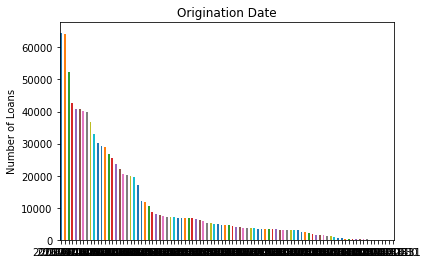

2016-12-31    64574
2016-10-31    64272
2017-01-31    52433
2016-08-31    42772
2016-09-30    40922
2017-04-30    40713
2017-03-31    40303
2017-05-31    39985
2016-11-30    36773
2017-09-30    32881
2017-10-31    30065
2017-08-31    29296
2016-07-31    29048
2017-02-28    26752
2016-05-31    25476
2016-06-30    23716
2017-11-30    22231
2017-07-31    20604
2017-06-30    20330
2018-05-31    19960
2018-04-30    19525
2016-04-30    17206
2016-03-31    12062
2018-03-31    11635
2017-12-31    10692
2015-12-31     8650
2015-10-31     7977
2016-01-31     7806
2014-04-30     7451
2014-03-31     7225
              ...  
2014-06-30     3052
2015-02-28     2923
2014-10-31     2920
2014-02-28     2916
2012-11-30     2510
2012-04-30     2282
2012-10-31     1978
2012-08-31     1693
2012-09-30     1596
2012-02-29     1557
2012-07-31     1402
2012-05-31     1187
2012-06-30     1152
2018-01-31     1005
2012-01-31      541
2011-12-31      419
2011-11-30      201
2011-08-31      158
2011-10-31      155


In [18]:
#set origination date as index
#df.set_index(['originationdate'])
draw(df.originationdate, title='Origination Date', ylabel='Number of Loans', sort=True)

In [151]:
df.originationdate.describe()

count         995754
unique            77
top       2016-12-31
freq           64574
Name: originationdate, dtype: object

# CIK Number

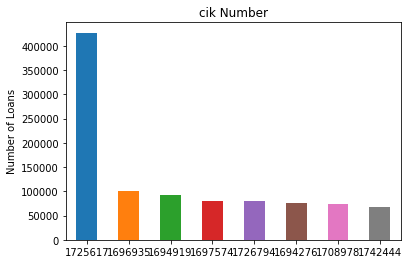

1725617    427244
1696935     99667
1694919     92557
1697574     79235
1726794     79095
1694276     76690
1708978     74104
1742444     67162
Name: cik, dtype: int64


In [152]:
draw(df.cik, title='cik Number', ylabel='Number of Loans', sort=True)

In [153]:
df.drop(['cik'],axis=1, inplace=True)
df.shape

(995754, 75)

# Accession Number

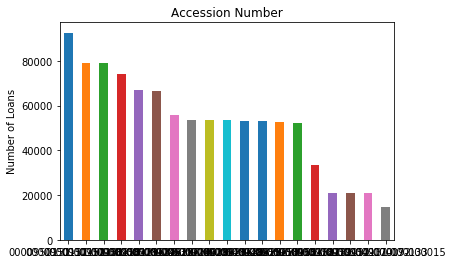

0000950131-17-000068    92557
0000950131-17-000083    79235
0000950131-18-000011    79095
0000950131-18-000048    74104
0000950123-18-006317    67162
0000950131-17-000040    66363
0000929638-18-000030    55710
0000929638-18-000431    53447
0000929638-18-000483    53443
0000929638-18-000552    53442
0000929638-18-000589    53195
0000929638-18-000653    52911
0000929638-18-000727    52669
0000929638-18-000790    52427
0000950131-18-000049    33304
0000950131-17-000070    20737
0000950131-17-000092    20737
0000950131-17-000133    20737
0000950131-17-000015    14479
Name: accessionnumber, dtype: int64


In [154]:
draw(df.accessionnumber, title='Accession Number', ylabel='Number of Loans', sort=True)

In [155]:
df.drop(['accessionnumber'],axis=1, inplace=True)
df.shape

(995754, 74)

# Asset Type Number

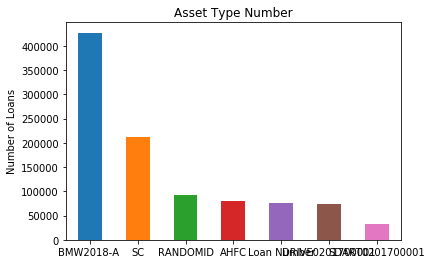

BMW2018-A          427244
SC                 212620
RANDOMID            92557
AHFC                79235
Loan Number         76690
DRIVE0201700001     74104
SDART0201700001     33304
Name: assettypenumber, dtype: int64


In [156]:
draw(df.assettypenumber, title='Asset Type Number', ylabel='Number of Loans', sort=True)

In [157]:
df.drop(['assettypenumber'],axis=1, inplace=True)
df.shape

(995754, 73)

# Reporting Period Beginning Date

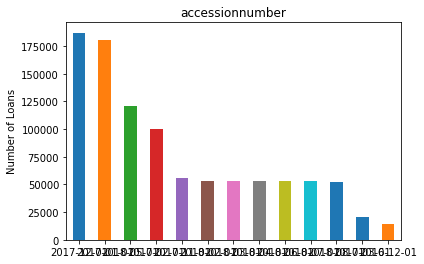

2017-12-01    187021
2017-01-01    180685
2018-05-01    120386
2017-02-01     99972
2017-11-01     55710
2018-02-01     53447
2018-03-01     53443
2018-04-01     53442
2018-06-01     52911
2018-07-01     52669
2018-08-01     52427
2017-03-01     20737
2016-12-01     14479
Name: reportingperiodbeginningdate, dtype: int64


In [22]:
draw(df.reportingperiodbeginningdate, title='accessionnumber', ylabel='Number of Loans', sort=True)

In [158]:
df.drop(['reportingperiodbeginningdate'],axis=1, inplace=True)
df.shape

(995754, 72)

# Originators Name

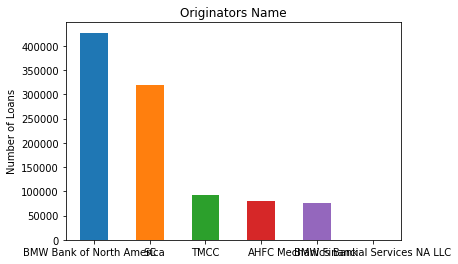

BMW Bank of North America        426891
SC                               320028
TMCC                              92557
AHFC                              79235
Mechanics Bank                    76690
BMW Financial Services NA LLC       353
Name: originatorname, dtype: int64


In [159]:
draw(df.originatorname, title='Originators Name', ylabel='Number of Loans', sort=True)

# Create Features for Originators

In [ ]:
def map_originatorname(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.originatorname).index.tolist()

for code in codes:
        df['originator_{}'.format(code)] = list(map(map_originatorname, df.originatorname))


In [ ]:
df.drop(['originatorname'],axis=1, inplace=True)
df.shape

# Original Loan Amount

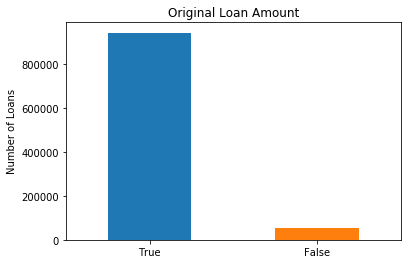

True     943225
False     52529
Name: originalloanamount, dtype: int64


In [161]:
draw(df.originalloanamount>10000, title='Original Loan Amount', ylabel='Number of Loans', sort=True)

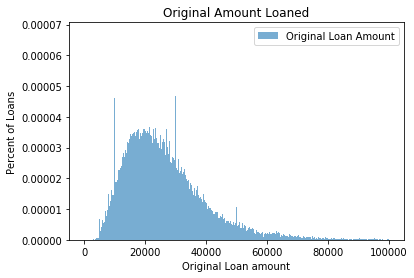

In [162]:
bins = np.linspace(0, 100000, 1000)
plt.hist(df.originalloanamount, bins, alpha=0.6, density=True, label='Original Loan Amount')
plt.legend(loc='upper right')
plt.title("Original Amount Loaned")
plt.xlabel('Original Loan amount')
plt.ylabel('Percent of Loans')
plt.show()

In [26]:
df.originalloanamount.describe()

count    997329.000000
mean      26782.123195
std       14194.515677
min        1624.630000
25%       16920.840000
50%       24005.610000
75%       33207.560000
max      189984.120000
Name: originalloanamount, dtype: float64

In [165]:
u=pd.value_counts(df.originalloanamount<=0)
if len(u)<2:
    print('No original loan amount blank or below zero')
else: 
    print('Number of original loan amount rows blank or below zero',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with original loan amount more than zero')
    df=df[df.originalloanamount>0]
df.shape

No original loan amount blank or below zero


(995754, 71)

# Orignial Loan Term

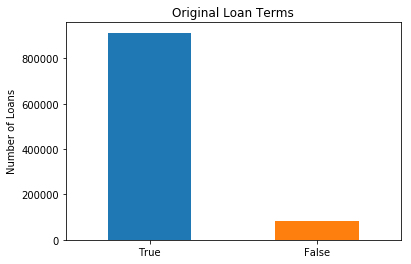

True     913035
False     82719
Name: originalloanterm, dtype: int64


In [166]:
draw(df.originalloanterm>48, title='Original Loan Terms', ylabel='Number of Loans',sort=True)

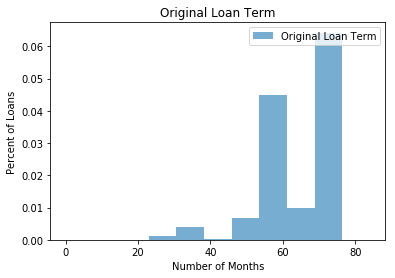

In [167]:
bins = np.linspace(0, 84, 12)
plt.hist(df.originalloanterm, bins, alpha=0.6, density=True, label='Original Loan Term')
plt.legend(loc='upper right')
plt.title("Original Loan Term")
plt.xlabel('Number of Months')
plt.ylabel('Percent of Loans')
plt.show()

In [168]:
df.originalloanterm.describe()

count    995754.000000
mean         64.608213
std           9.537029
min          12.000000
25%          60.000000
50%          66.000000
75%          72.000000
max          75.000000
Name: originalloanterm, dtype: float64

In [169]:
u=pd.value_counts(df.originalloanterm<=0)
if len(u)<2:
    print('No original loan term blank or below zero')
else: 
    print('Number of original loan term rows blank or below zero',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with original loan term more than zero')
    df=df[df.originalloanterm>0]
df.shape

No original loan term blank or below zero


(995754, 71)

# Original interest rate percentage

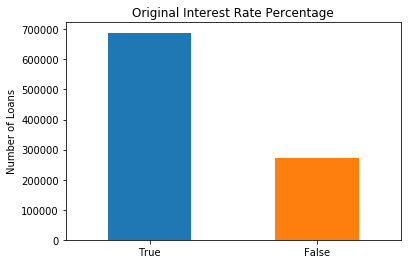

True     688839
False    271412
Name: originalinterestratepercentage, dtype: int64


In [174]:
draw(df.originalinterestratepercentage<2.0, title='Original Interest Rate Percentage', ylabel='Number of Loans',sort=True)

In [171]:
df.originalinterestratepercentage.describe()

count    995754.000000
mean          1.688689
std           2.463216
min           0.000000
25%           0.139000
50%           0.900000
75%           2.900000
max          22.990000
Name: originalinterestratepercentage, dtype: float64

In [172]:
u=pd.value_counts(df.originalinterestratepercentage<=0)
if len(u)<2:
    print('No original interest rate blank or below zero')
else: 
    print('Number of original interest rate rows blank or below zero',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with original interest rate more than zero')
    #df=df[df.originalinterestratepercentage>0]
df.shape

Number of original interest rate rows blank or below zero : 35503
Dropping  35503 rows and retaining loans with original interest rate more than zero


(960251, 71)

# No interest rate loans

In [32]:
y=pd.value_counts(df.originalinterestratepercentage==0)
print('No interest rate for',y[1],'loans')

No interest rate for 35504 loans


# Underwriting Indicator

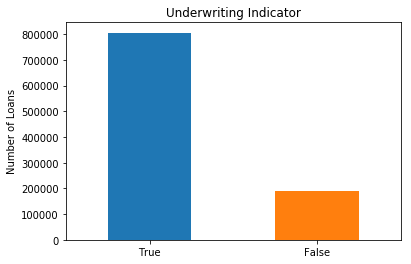

True     805614
False    191715
Name: underwritingindicator, dtype: int64


In [33]:
draw(df.underwritingindicator, title='Underwriting Indicator', ylabel='Number of Loans', sort=True)

# Create Feature Column for Underwriting TRUE

In [34]:
def map_underwriting_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == True:
            return 1
        elif column == False:
            return 0
        
df['underwriting_true'] = list(map(map_underwriting_true, df.underwritingindicator))
df.drop(['underwritingindicator'], axis=1, inplace=True)
pd.value_counts(df.underwriting_true)

1    805614
0    191715
Name: underwriting_true, dtype: int64

# Subvented

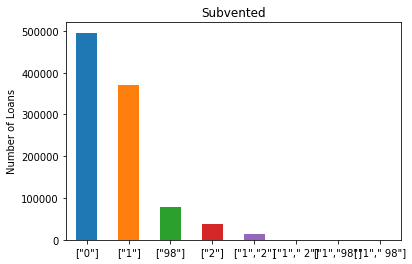

["0"]          495724
["1"]          370269
["98"]          79104
["2"]           38800
["1","2"]       12818
["1"," 2"]        590
["1","98"]         14
["1"," 98"]        10
Name: subvented, dtype: int64


In [35]:
draw(df.subvented, title='Subvented', ylabel='Number of Loans', sort=True)

In [36]:
df.subvented.describe(include='all')

count     997329
unique         8
top        ["0"]
freq      495724
Name: subvented, dtype: object

# Create Feature Column for Subvented

In [37]:
def map_subvented_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == '["0"]':
            return 0
        else:
            return 1
        
df['subvented_true'] = list(map(map_subvented_true, df.subvented))
df.drop(['subvented'], axis=1, inplace=True)
pd.value_counts(df.subvented_true)

1    501605
0    495724
Name: subvented_true, dtype: int64

# Vehicle New or Used code

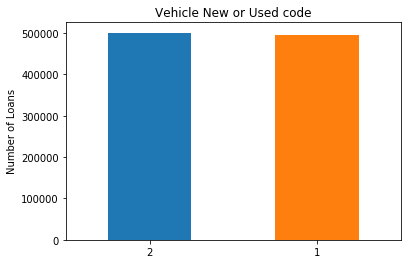

2    501012
1    496317
Name: vehiclenewusedcode, dtype: int64


In [38]:
draw(df.vehiclenewusedcode, title='Vehicle New or Used code', ylabel='Number of Loans', sort=True)

# Create Feature Column for New or Used

In [39]:
def map_vehiclenewusedcode_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == 1:
            return 1
        else:
            return 0
        
df['vehiclenew_true'] = list(map(map_vehiclenewusedcode_true, df.vehiclenewusedcode))
df.drop(['vehiclenewusedcode'], axis=1, inplace=True)
pd.value_counts(df.vehiclenew_true)

0    501012
1    496317
Name: vehiclenew_true, dtype: int64

# Vehicle Type code

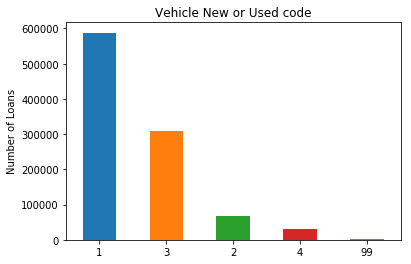

1     588022
3     310237
2      66267
4      31419
99      1384
Name: vehicletypecode, dtype: int64


In [40]:
draw(df.vehicletypecode, title='Vehicle New or Used code', ylabel='Number of Loans', sort=True)

In [41]:
df.vehicletypecode.describe()

count    997329.000000
mean          1.919085
std           3.751943
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          99.000000
Name: vehicletypecode, dtype: float64

In [175]:
df.drop(['vehicletypecode'],axis=1, inplace=True)
df.shape

(960251, 70)

# Obligor Credit Score Type

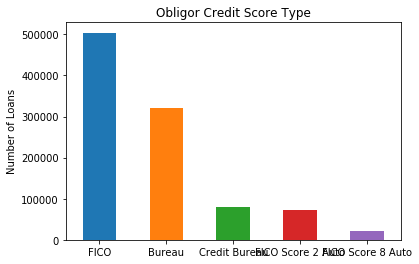

FICO                 503934
Bureau               321009
Credit Bureau         79235
FICO Score 2 Auto     71401
FICO Score 8 Auto     21750
Name: obligorcreditscoretype, dtype: int64


In [42]:
draw(df.obligorcreditscoretype, title='Obligor Credit Score Type', ylabel='Number of Loans', sort=True)

In [43]:
df.obligorcreditscoretype.describe()

count     997329
unique         5
top         FICO
freq      503934
Name: obligorcreditscoretype, dtype: object

In [44]:
pd.value_counts(df.obligorcreditscoretype==0)

False    997329
Name: obligorcreditscoretype, dtype: int64

# Create features for obligator credit score type

In [176]:
def map_obligorcreditscoretype(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligorcreditscoretype).index.tolist()

for code in codes:
        df['credit_type_{}'.format(code)] = list(map(map_obligorcreditscoretype, df.obligorcreditscoretype))


In [177]:
df.drop(['obligorcreditscoretype'], axis=1, inplace=True)
df.shape

(960251, 74)

# Obligor Credit Score

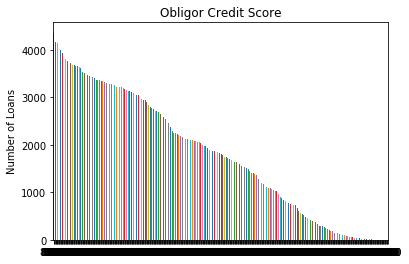

825.0    4361
677.0    4269
818.0    4184
827.0    4173
817.0    4170
831.0    4162
826.0    4134
824.0    4124
816.0    4088
830.0    4041
834.0    4012
828.0    3997
833.0    3984
805.0    3940
822.0    3928
815.0    3903
836.0    3847
814.0    3821
820.0    3814
812.0    3810
853.0    3788
821.0    3786
842.0    3770
705.0    3765
832.0    3758
747.0    3744
837.0    3743
738.0    3733
823.0    3733
810.0    3729
         ... 
399.0      10
397.0       7
402.0       7
389.0       7
398.0       7
395.0       7
393.0       6
385.0       5
384.0       5
391.0       4
387.0       4
396.0       3
374.0       3
380.0       3
378.0       3
383.0       3
375.0       2
373.0       2
370.0       2
381.0       1
390.0       1
377.0       1
386.0       1
372.0       1
371.0       1
388.0       1
366.0       1
363.0       1
359.0       1
382.0       1
Name: obligorcreditscore, Length: 533, dtype: int64


In [45]:
draw(df.obligorcreditscore, title='Obligor Credit Score', ylabel='Number of Loans', sort=True)

In [46]:
df.obligorcreditscore.describe()

count    953782.000000
mean        716.953510
std         106.942971
min           0.000000
25%         639.000000
50%         730.000000
75%         806.000000
max         900.000000
Name: obligorcreditscore, dtype: float64

# zero credit score loans

In [47]:
y=pd.value_counts(df.obligorcreditscore==0)
print('No Credit score for',y[1],'loans')

No Credit score for 660 loans


# Unfilled Credit Score

In [48]:
df.obligorcreditscore.fillna(0, inplace=True)
y=pd.value_counts(df.obligorcreditscore==0)
print('No Credit score for',y[1],'loans')

No Credit score for 44207 loans


# Remove rows with no credit score

In [49]:
df.obligorcreditscore.replace(0, np.nan, inplace=True)
df.obligorcreditscore.dropna(axis=0,inplace=True)

In [50]:
df.shape

(997329, 76)

# Obligor Income Verification Level Code

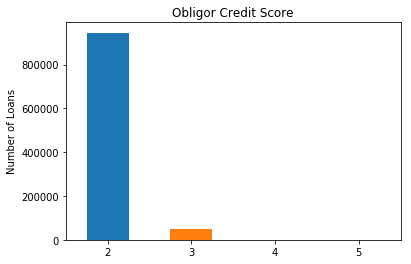

2    945882
3     51310
4       116
5        21
Name: obligorincomeverificationlevelcode, dtype: int64


In [51]:
draw(df.obligorincomeverificationlevelcode, title='Obligor Credit Score', ylabel='Number of Loans', sort=True)

In [52]:
df.obligorincomeverificationlevelcode.describe()

count    997329.000000
mean          2.051743
std           0.222317
min           2.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           5.000000
Name: obligorincomeverificationlevelcode, dtype: float64

In [53]:
pd.value_counts(df.obligorincomeverificationlevelcode==0)

False    997329
Name: obligorincomeverificationlevelcode, dtype: int64

# Create Feature Columns for Obligor Income Verification Code 2,3,4 and 5

In [54]:
def map_obligorincomeverificationlevelcode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligorincomeverificationlevelcode).index.tolist()

for code in codes:
        df['income_{}'.format(code)] = list(map(map_obligorincomeverificationlevelcode, df.obligorincomeverificationlevelcode))


In [55]:
pd.value_counts(df.income_2)

1    945882
0     51447
Name: income_2, dtype: int64

In [56]:
pd.value_counts(df.income_3)

0    946019
1     51310
Name: income_3, dtype: int64

In [57]:
pd.value_counts(df.income_4)

0    997213
1       116
Name: income_4, dtype: int64

In [58]:
pd.value_counts(df.income_5)

0    997308
1        21
Name: income_5, dtype: int64

In [59]:
df.drop(['obligorincomeverificationlevelcode'], axis=1, inplace=True)

# Obligor Employment Verification Code

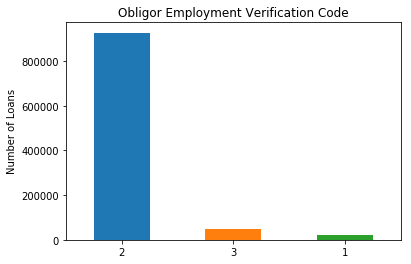

2    927136
3     49176
1     21017
Name: obligoremploymentverificationcode, dtype: int64


In [60]:
draw(df.obligoremploymentverificationcode, title='Obligor Employment Verification Code', ylabel='Number of Loans', sort=True)

In [61]:
pd.value_counts(df.obligoremploymentverificationcode==0)

False    997329
Name: obligoremploymentverificationcode, dtype: int64

In [62]:
df.obligoremploymentverificationcode.describe()

count    997329.000000
mean          2.028234
std           0.263788
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: obligoremploymentverificationcode, dtype: float64

# Create feature Columns for obligor employment verification code 1,2 and 3

In [63]:
def map_obligoremploymentverificationcode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligoremploymentverificationcode).index.tolist()

for code in codes:
        df['employment_{}'.format(code)] = list(map(map_obligoremploymentverificationcode, df.obligoremploymentverificationcode))


In [64]:
pd.value_counts(df.employment_1)

0    976312
1     21017
Name: employment_1, dtype: int64

In [65]:
pd.value_counts(df.employment_2)

1    927136
0     70193
Name: employment_2, dtype: int64

In [66]:
pd.value_counts(df.employment_3)

0    948153
1     49176
Name: employment_3, dtype: int64

In [67]:
df.drop(['obligoremploymentverificationcode'], axis=1, inplace=True)

# Reporting Period Actual End Balance Amount

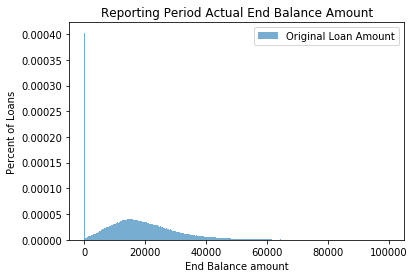

In [68]:
bins = np.linspace(0, 100000, 1000)
plt.hist(df.reportingperiodactualendbalanceamount, bins, alpha=0.6, density=True, label='Original Loan Amount')
plt.legend(loc='upper right')
plt.title("Reporting Period Actual End Balance Amount")
plt.xlabel('End Balance amount')
plt.ylabel('Percent of Loans')
plt.show()

In [69]:
#draw(df.reportingperiodactualendbalanceamount, title='Reporting Period Actual End Balance Amount', ylabel='Number of Loans')

In [70]:
pd.value_counts(df.reportingperiodactualendbalanceamount)

0.00        39680
0.01           73
10000.00       64
20000.00       52
5000.00        49
12000.00       46
13000.00       42
15000.00       37
9000.00        36
7500.00        36
8000.00        33
18000.00       32
6000.00        31
14000.00       31
13500.00       30
7000.00        29
17000.00       29
11000.00       28
0.04           27
4000.00        27
19000.00       27
11500.00       25
12500.00       25
20500.00       24
25000.00       24
3000.00        24
23500.00       23
6500.00        23
21000.00       22
21500.00       22
            ...  
11637.79        1
12576.81        1
11658.21        1
5358.54         1
25057.36        1
7567.45         1
25059.61        1
11636.79        1
16938.43        1
25059.86        1
25069.61        1
5357.54         1
24594.39        1
16938.93        1
43251.02        1
17109.07        1
24594.64        1
56696.63        1
25575.99        1
3871.89         1
32672.29        1
11636.29        1
32607.96        1
24605.39        1
16933.93  

In [71]:
pd.value_counts(df.totalactualamountpaid)

 0.00        182168
 500.00       19089
 400.00       13495
 600.00       10808
 300.00        9775
 1000.00       8927
 700.00        5942
 350.00        5410
 450.00        4824
 800.00        4144
 200.00        3749
 550.00        3739
 250.00        3580
 650.00        2828
 750.00        2164
 2000.00       1828
 900.00        1763
 360.00        1577
 1500.00       1534
 320.00        1396
 420.00        1370
 1200.00       1291
 375.00        1270
 380.00        1267
 425.00        1204
 460.00        1156
 430.00        1107
 340.00        1098
 330.00        1089
 370.00        1088
              ...  
 881.27           1
 866.63           1
 752.48           1
 17390.94         1
 1012.87          1
 1551.91          1
-45.86            1
 14275.91         1
 1987.30          1
 140.67           1
 8599.01          1
 13498.75         1
 1668.56          1
 1696.29          1
 99.26            1
 199.33           1
-16.61            1
 867.71           1
 892.29           1


In [72]:
pd.value_counts(df.actualinterestcollectedamount)

0.00       223814
300.00        807
200.00        730
400.00        727
500.00        592
100.00        384
250.00        369
350.00        350
600.00        340
450.00        270
150.00        262
700.00        192
550.00        161
320.00        141
360.00        140
380.00        134
19.23         126
650.00        125
15.80         120
12.05         119
11.93         119
420.00        119
18.53         118
15.36         118
19.10         118
14.94         118
18.13         117
16.24         117
15.28         117
16.89         116
            ...  
667.52          1
676.33          1
317.73          1
762.10          1
501.59          1
303.44          1
880.43          1
690.03          1
922.70          1
583.98          1
535.59          1
532.41          1
477.93          1
476.07          1
384.85          1
482.56          1
1191.75         1
762.85          1
460.80          1
807.11          1
693.78          1
460.22          1
422.81          1
324.33          1
576.23    

In [73]:
pd.value_counts(df.actualprincipalcollectedamount)

0.00        218533
500.00        1266
400.00         813
300.00         486
600.00         466
350.00         334
1000.00        288
450.00         279
700.00         216
550.00         189
250.00         167
800.00         129
200.00         124
375.00          93
360.00          87
650.00          87
425.00          84
420.00          81
325.00          72
430.00          69
380.00          68
370.00          66
310.00          66
320.00          64
480.00          64
330.00          63
460.00          62
440.00          61
410.00          60
750.00          58
             ...  
1284.80          1
6567.49          1
16127.83         1
946.52           1
1234.25          1
868.76           1
852.68           1
3477.04          1
50905.79         1
1036.09          1
792.39           1
1069.81          1
1214.33          1
1297.44          1
1153.67          1
28920.23         1
1035.66          1
627.27           1
26529.35         1
19769.81         1
8151.83          1
1006.38     

In [74]:
pd.value_counts(df.interestpaidthroughdate)

1900-01-01    34477
2017-12-15    11412
2017-12-01     8135
2017-12-08     7805
2017-12-29     7792
2017-12-14     7103
2017-12-22     6695
2017-02-01     6581
2017-12-04     6424
2017-12-05     6362
2017-12-11     6024
2017-12-12     5885
2017-12-07     5830
2017-12-13     5751
2017-01-20     5614
2017-02-10     5301
2017-12-06     5224
2017-02-28     5220
2017-12-28     5196
2017-02-15     5087
2017-01-27     5069
2017-01-17     4962
2017-11-30     4900
2017-01-13     4880
2018-02-28     4673
2017-02-03     4595
2018-05-25     4581
2017-12-09     4532
2017-01-10     4503
2017-12-20     4489
              ...  
2020-02-17        1
2016-02-25        1
2021-01-01        1
2019-06-14        1
2016-06-03        1
2015-10-31        1
2018-09-23        1
2015-01-22        1
2016-04-18        1
2019-05-28        1
2016-05-24        1
2019-01-27        1
2014-04-13        1
2015-03-04        1
2016-04-10        1
2019-09-17        1
2018-10-26        1
2014-12-07        1
2016-07-22        1


In [75]:
pd.value_counts(df.currentdelinquencystatus)

 0      900654
 2        6152
 5        6068
 3        4884
 4        4657
 1        4081
 6        3827
 10       3771
 15       3696
 7        3659
 8        3191
 9        2941
 12       2459
 11       2270
 14       2215
 13       2212
 16       2074
 17       1996
 30       1921
 18       1703
 20       1699
 19       1612
 21       1384
 22       1202
 23       1123
 25       1122
 26       1087
 24       1002
 27        918
 29        880
         ...  
 307         4
 267         4
 314         4
 289         4
 328         3
 282         3
 356         3
 355         3
 349         3
 313         3
 341         3
 339         3
 323         3
 342         3
 337         3
 262         3
 321         2
 348         2
 350         2
 351         2
 271         2
 332         2
 343         1
 442         1
 391         1
 390         1
 354         1
 358         1
 353         1
-1           1
Name: currentdelinquencystatus, Length: 362, dtype: int64

In [76]:
pd.value_counts(df.chargedoffprincipalamount)

0.00        497894
20159.00         2
17752.00         2
15316.69         1
17759.02         1
13736.00         1
17792.23         1
32494.20         1
8104.20          1
13825.75         1
15297.56         1
28718.46         1
16936.02         1
14089.11         1
16964.98         1
16957.52         1
17023.48         1
8990.95          1
13886.25         1
28224.86         1
19879.68         1
8081.45          1
13704.00         1
13955.00         1
14409.56         1
22943.66         1
31762.05         1
14280.89         1
12033.12         1
14275.89         1
             ...  
6898.02          1
9120.10          1
7695.85          1
22389.22         1
21586.78         1
18723.87         1
18769.62         1
22012.03         1
19073.62         1
26946.58         1
17077.06         1
23838.69         1
11527.60         1
11524.85         1
17046.81         1
20307.00         1
18785.28         1
10669.52         1
20387.00         1
20441.50         1
20453.50         1
16276.58    

In [77]:
pd.value_counts(df.recoveredamount)

 0.00        497536
-405.00          80
-385.00          75
-85.00           15
-700.00          14
-185.00          13
-175.00          11
-370.00          10
-600.00           8
-581.00           7
-150.00           7
 200.00           7
-325.00           6
-425.00           6
 50.00            5
 300.00           5
-300.00           5
-225.00           5
-75.00            4
 350.00           4
-400.00           4
-25.00            4
 100.00           4
 500.00           4
-200.00           3
-80.00            3
 175.00           3
-56.00            3
-50.00            3
 9026.00          3
              ...  
 21653.00         1
 506.10           1
 144.18           1
 5428.50          1
 5433.00          1
 5436.00          1
 2107.40          1
 320.23           1
 21765.50         1
 5329.50          1
 7779.90          1
 5326.00          1
 5238.00          1
 12490.17         1
 783.13           1
 5398.93          1
 5206.00          1
 5221.00          1
 7876.90          1


In [78]:
pd.value_counts(df.repossessedindicator)

False    991855
True       5474
Name: repossessedindicator, dtype: int64

In [79]:
pd.value_counts(df.repossessedproceedsamount)

 0.00        524590
-385.00         557
-405.00         135
-125.00          91
-150.00          70
-185.00          67
-370.00          54
-85.00           50
-175.00          23
-425.00          19
-25.00           16
-700.00          16
-325.00          12
-600.00          10
-200.00          10
-75.00            9
-165.00           8
-225.00           8
-15.00            8
-400.00           7
-581.00           7
-8.00             5
-100.00           5
-275.00           5
-205.00           5
-535.00           5
-510.00           5
-300.00           5
-350.00           4
-56.00            4
              ...  
-290.00           1
 4649.00          1
 10244.98         1
 4651.50          1
 19501.00         1
 19453.00         1
 4844.75          1
 4839.50          1
 19331.00         1
 1206.00          1
 4808.00          1
 4802.50          1
 7853.00          1
 1199.50          1
 4782.50          1
 4776.00          1
 4769.50          1
-298.00           1
 4758.00          1


# Clean data

In [80]:
# change columns to lower case and remove prefix to enable pandas to work
column_list=[x.lower() for x in (column_list)]
df.columns=df.columns.str.replace('abs_loan.','')
# convert objects to numeric
#df=df.convert_objects(convert_numeric=True)

# Check for null

In [81]:
df.isnull().values.any()

True

# Loan Statistics

In [82]:
df.describe()

,cik,originalloanamount,originalloanterm,originalinterestratepercentage,interestcalculationtypecode,originalinterestratetypecode,originalinterestonlytermnumber,graceperiodnumber,paymenttypecode,vehiclemodelyear,...,underwriting_true,subvented_true,vehiclenew_true,income_2,income_3,income_4,income_5,employment_2,employment_3,employment_1
count,9.973290e+05,997329.000000,997329.000000,997329.000000,997329.0,997329.0,76690.0,997329.000000,997329.0,997329.000000,...,997329.000000,997329.000000,997329.000000,997329.000000,997329.000000,997329.000000,997329.000000,997329.000000,997329.000000,997329.000000
mean,1.715213e+06,26782.123195,64.619998,1.686214,1.0,1.0,0.0,1.097445,2.0,2014.391710,...,0.807772,0.502948,0.497646,0.948415,0.051447,0.000116,0.000021,0.929619,0.049308,0.021073
std,1.550455e+04,14194.515677,9.534591,2.462058,0.0,0.0,0.0,0.588963,0.0,2.464389,...,0.394052,0.499992,0.499995,0.221187,0.220909,0.010784,0.004589,0.255788,0.216510,0.143629
min,1.694276e+06,1624.630000,12.000000,0.000000,1.0,1.0,0.0,0.000000,2.0,1994.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.696935e+06,16920.840000,60.000000,0.138500,1.0,1.0,0.0,1.000000,2.0,2013.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.725617e+06,24005.610000,66.000000,0.900000,1.0,1.0,0.0,1.000000,2.0,2015.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.725617e+06,33207.560000,72.000000,2.900000,1.0,1.0,0.0,1.000000,2.0,2016.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.742444e+06,189984.120000,75.000000,22.990000,1.0,1.0,0.0,3.000000,2.0,2019.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Current Vs Other Buckets

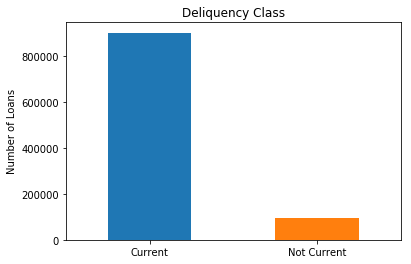

Number of loans Current : 900655     Number of loans Not Current : 96674


In [83]:
LABELS = ('Current', 'Not Current')
count_classes = pd.value_counts(df.currentdelinquencystatus>0, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title('Deliquency Class')
plt.ylabel("Number of Loans")
plt.show()
print('Number of loans Current :', count_classes[0],'   ', 'Number of loans Not Current :', count_classes[1],)

In [84]:
pd.value_counts(df.currentdelinquencystatus)

 0      900654
 2        6152
 5        6068
 3        4884
 4        4657
 1        4081
 6        3827
 10       3771
 15       3696
 7        3659
 8        3191
 9        2941
 12       2459
 11       2270
 14       2215
 13       2212
 16       2074
 17       1996
 30       1921
 18       1703
 20       1699
 19       1612
 21       1384
 22       1202
 23       1123
 25       1122
 26       1087
 24       1002
 27        918
 29        880
         ...  
 307         4
 267         4
 314         4
 289         4
 328         3
 282         3
 356         3
 355         3
 349         3
 313         3
 341         3
 339         3
 323         3
 342         3
 337         3
 262         3
 321         2
 348         2
 350         2
 351         2
 271         2
 332         2
 343         1
 442         1
 391         1
 390         1
 354         1
 358         1
 353         1
-1           1
Name: currentdelinquencystatus, Length: 362, dtype: int64

# Label Creation

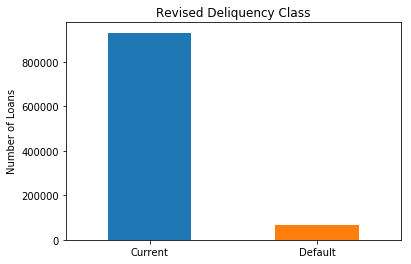

Number of loans Current : 930324     Number of loans Defaulted : 67005


In [85]:
def map_label(*args):
    columns = [col for col in args]
    for column in columns:
        if column > default_months:
            return 1
        elif column <= default_months:
            return 0
        
df['label'] = list(map(map_label, df.currentdelinquencystatus ))

LABELS = ('Current', 'Default')
count_classes = pd.value_counts(df.label, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title('Revised Deliquency Class')
plt.ylabel("Number of Loans")
plt.show()
print('Number of loans Current :', count_classes[0],'   ', 'Number of loans Defaulted :', count_classes[1],)

# Loan Balance Amount at the End of Reporting Period

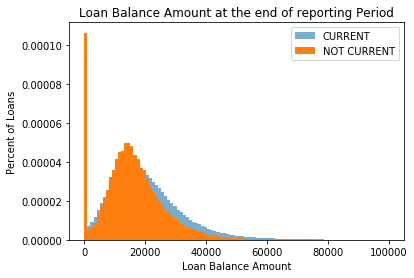

In [86]:
current_df = df[df.label==0]
not_current_df = df[df.label==1]
bins = np.linspace(0, 100000, 100)
plt.hist(current_df.reportingperiodactualendbalanceamount, bins, alpha=0.6, density=True, label='CURRENT')
plt.hist(not_current_df.reportingperiodactualendbalanceamount, bins, alpha=1, density=True, label='NOT CURRENT')
plt.legend(loc='upper right')
plt.title("Loan Balance Amount at the end of reporting Period")
plt.xlabel('Loan Balance Amount')
plt.ylabel('Percent of Loans')
plt.show()

#  Clean up for Machine Learning

In [87]:
df.fillna(0, inplace=True)
df=df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)
df.head()

,cik,accessionnumber,assettypenumber,assetnumber,reportingperiodbeginningdate,reportingperiodendingdate,originatorname,originationdate,originalloanamount,originalloanterm,...,subvented_true,vehiclenew_true,income_2,income_3,income_4,income_5,employment_2,employment_3,employment_1,label
0,1725617,0000929638-18-000030,BMW2018-A,1001536189,2017-11-01,2017-11-30,BMW Bank of North America,2012-12-31,25124.50,72,...,1,1,1,0,0,0,1,0,0,0
1,1725617,0000929638-18-000030,BMW2018-A,1001536759,2017-11-01,2017-11-30,BMW Bank of North America,2012-12-31,43257.34,72,...,1,1,1,0,0,0,1,0,0,0
2,1725617,0000929638-18-000030,BMW2018-A,1001536970,2017-11-01,2017-11-30,BMW Bank of North America,2012-12-31,56917.54,72,...,1,1,1,0,0,0,1,0,0,0
3,1725617,0000929638-18-000030,BMW2018-A,1001537061,2017-11-01,2017-11-30,BMW Bank of North America,2012-12-31,42003.57,72,...,1,1,1,0,0,0,1,0,0,0
4,1725617,0000929638-18-000030,BMW2018-A,1001537088,2017-11-01,2017-11-30,BMW Bank of North America,2012-12-31,77217.85,72,...,1,1,1,0,0,0,1,0,0,0


# Preparing data for Machine Learning

In [88]:
# prepare label
Y=df.label.values
Y.shape

(997329,)

In [89]:
# reshape labels for machine learning
Y=Y.reshape(Y.shape[0],1)
Y.shape

(997329, 1)

In [90]:
# prepare input data
input=df.values
input.shape

(997329, 82)

In [91]:
# calculate train/test split
len_train = int(len(input)*train_split)
print(len_train)

797863


In [92]:
# apply train/test split to labels
y_train = Y[0:len_train]
y_test = Y[len_train:]

In [93]:
#drop unneeded columns for creating input data
df.drop(['currentdelinquencystatus','label'], axis=1, inplace=True)

In [94]:
#reshape input data for machine learning
input=input.reshape(input.shape[0], input.shape[1], 1)
input.shape

(997329, 82, 1)

In [95]:
# apply train/test split to input data
x_train = input[0:len_train]
x_test = input[len_train:]

# Normalize input data

In [96]:
x_train_keras_scaled = keras.utils.normalize(x_train, axis=-1, order=2)
x_test_keras_scaled = keras.utils.normalize(x_test, axis=-1, order=2)
x_train_keras_scaled.shape

SystemError: <built-in method conjugate of int object at 0x0000000071BBE9B0> returned a result with an error set

# Model Architecture

In [ ]:
model = keras.Sequential()
model.add(keras.layers.GRU(254, activation='relu', input_shape=(x_train_keras_scaled.shape[1:]), return_sequences=True))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.GRU(128, activation='relu'))
model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(2, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-6)


# Model Configuration

In [ ]:
#save the best model
#keras.callbacks.Callback()
# checkPoint = ModelCheckpoint(filepath = path+'model/'+name+'.h5',
#                             save_best_only = True,
#                             verbose=0)
# tensorboard = TensorBoard(log_dir=path+'logs/{}'.format(name),
#                           histogram_freq=0,
#                           batch_size=32,
#                           write_graph=True,
#                           write_images=False)
# history = keras.callbacks.History()

# Train the Model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1, validation_data=(x_test_keras_scaled, y_test), 
        # callbacks = [
   # baseLogger,
    #history,
    #tensorboard
    #learningRateScheduler,
    #reduceLROnPlateau
     #    ], 
          shuffle=False
)


# Save the Model

In [ ]:
model.save(path+'model/'+name+'.h5')

In [ ]:
test_loss, test_acc = model.evaluate(x_test_keras_scaled, y_test)
print('Test Loss : ',test_loss,' ','Test Accuracy : ', test_acc)

# Load Saved Model

In [ ]:
saved_model = load_model(path+'model/ABS_Keras-GRU254GRU128D32D2-adam1540234475.h5')

In [ ]:
test_loss, test_acc = saved_model.evaluate(x_test_keras_scaled, y_test)
print('Test Loss : ',test_loss,' ','Test Accuracy : ', test_acc)